# Exploratory Data Analysis - Algae Microscopy Dataset

This notebook analyzes the VisAlgae 2023 dataset to understand the characteristics of different algae types.

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter, defaultdict
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [47]:
# Define class names and colors
CLASS_NAMES = [
    "Platymonas",         # Class 0
    "Chlorella",          # Class 1
    "Dunaliella salina",  # Class 2
    "Effrenium",          # Class 3
    "Porphyridium",       # Class 4
    "Haematococcus"       # Class 5
]

# Define distinct colors for each class (RGB format for matplotlib)
CLASS_COLORS = [
    '#1f77b4',  # Blue for Platymonas
    '#2ca02c',  # Green for Chlorella
    '#d62728',  # Red for Dunaliella salina
    '#ff7f0e',  # Orange for Effrenium
    '#9467bd',  # Purple for Porphyridium
    '#e377c2'   # Pink for Haematococcus
]

## 1. Load and Parse Label Data

In [48]:
label_dir = Path("../data/train/labels")

# Initialize data structures using defaultdict to avoid KeyError
class_counts = Counter()
heights = defaultdict(list)  # Fixed: Initialize as defaultdict
widths = defaultdict(list)   # Fixed: Initialize as defaultdict
areas = defaultdict(list)
aspect_ratios = defaultdict(list)

# Iterate through all .txt files in the labels directory
if label_dir.exists():
    for lbl_path in label_dir.glob("*.txt"):
        with open(lbl_path, 'r') as f:
            for line in f:
                if line.strip():
                    # YOLO format: class_id x_center y_center width height (normalized)
                    parts = line.split()
                    class_id = int(parts[0])
                    width = float(parts[3])
                    height = float(parts[4])
                    
                    # Store data
                    class_counts[class_id] += 1
                    widths[class_id].append(width)
                    heights[class_id].append(height)
                    areas[class_id].append(width * height)
                    aspect_ratios[class_id].append(width / height if height > 0 else 0)
else:
    print(f"Directory not found: {label_dir.resolve()}")

print("\nClass Distribution:")
for cid, count in sorted(class_counts.items()):
    print(f"{CLASS_NAMES[cid]}: {count} instances")


Class Distribution:
Platymonas: 184 instances
Chlorella: 722 instances
Dunaliella salina: 234 instances
Effrenium: 227 instances
Porphyridium: 272 instances
Haematococcus: 119 instances


## 2. Class Distribution Visualization

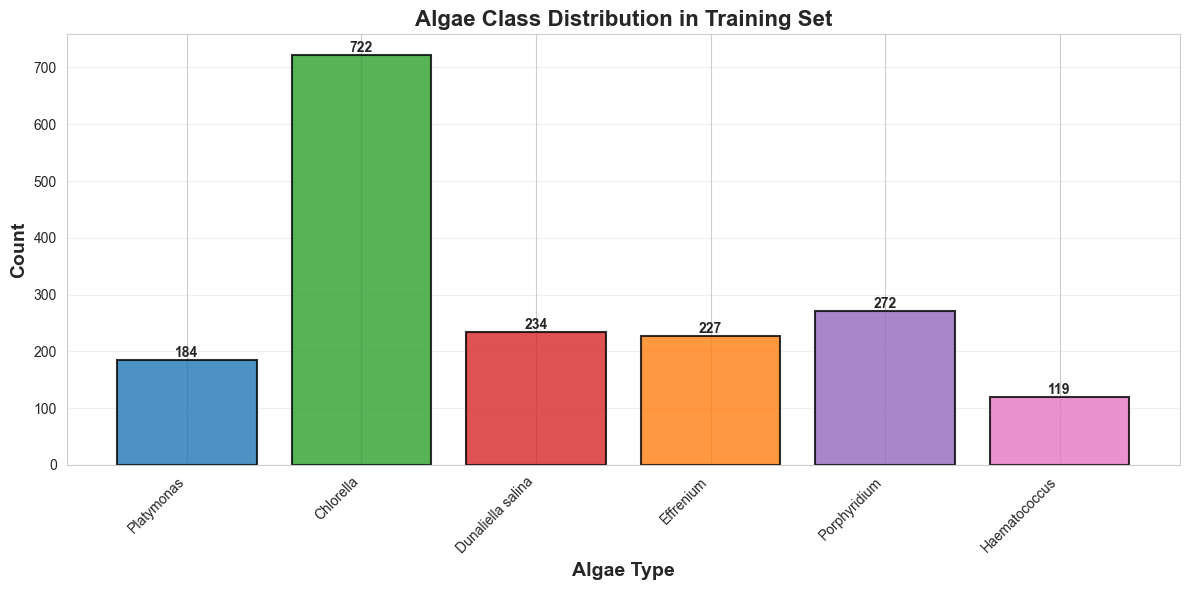

In [49]:
plt.figure(figsize=(12, 6))
classes = [CLASS_NAMES[i] for i in sorted(class_counts.keys())]
counts = [class_counts[i] for i in sorted(class_counts.keys())]
colors = [CLASS_COLORS[i] for i in sorted(class_counts.keys())]

bars = plt.bar(classes, counts, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Algae Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Algae Class Distribution in Training Set', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Height Distribution Analysis

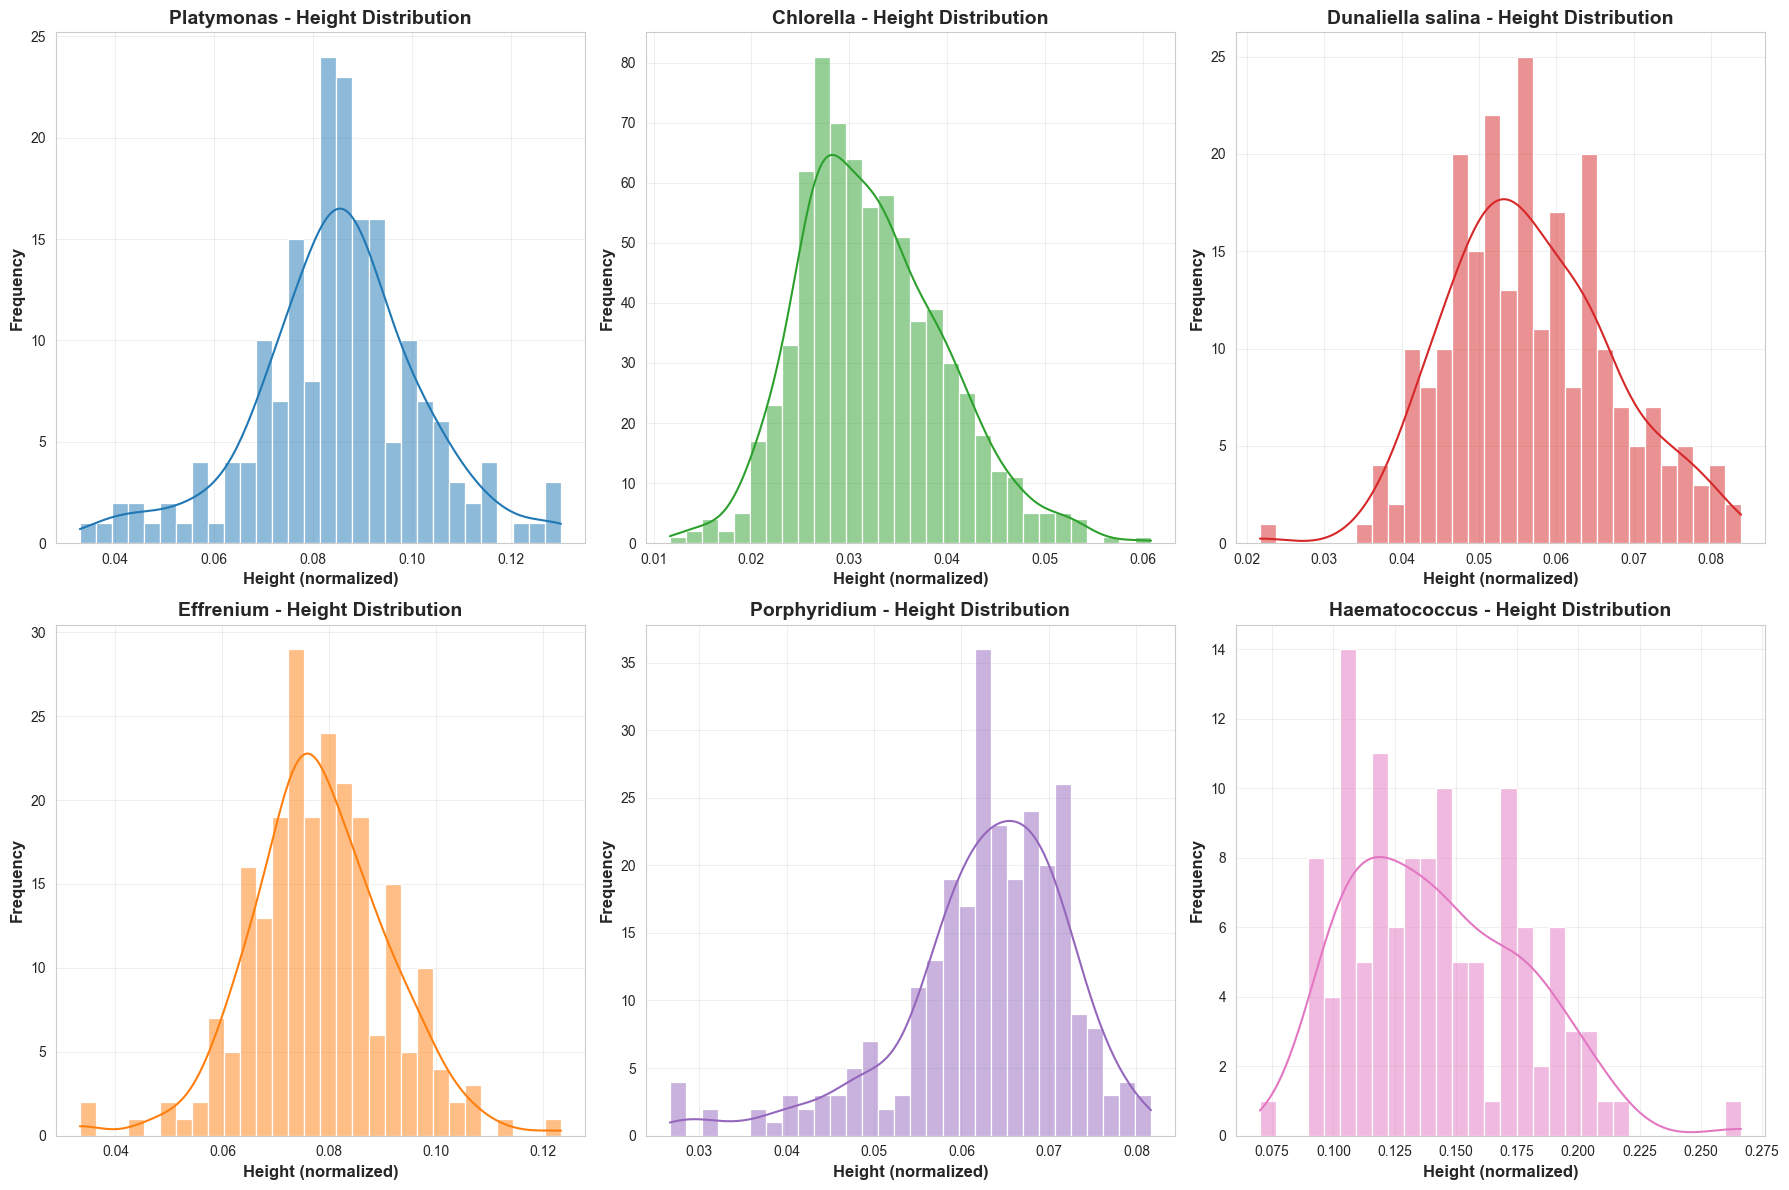

In [50]:
# Individual height distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, class_id in enumerate(sorted(heights.keys())):
    ax = axes[idx]
    sns.histplot(heights[class_id], bins=30, kde=True, color=CLASS_COLORS[class_id], ax=ax)
    ax.set_xlabel('Height (normalized)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'{CLASS_NAMES[class_id]} - Height Distribution', fontsize=14, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Width Distribution Analysis

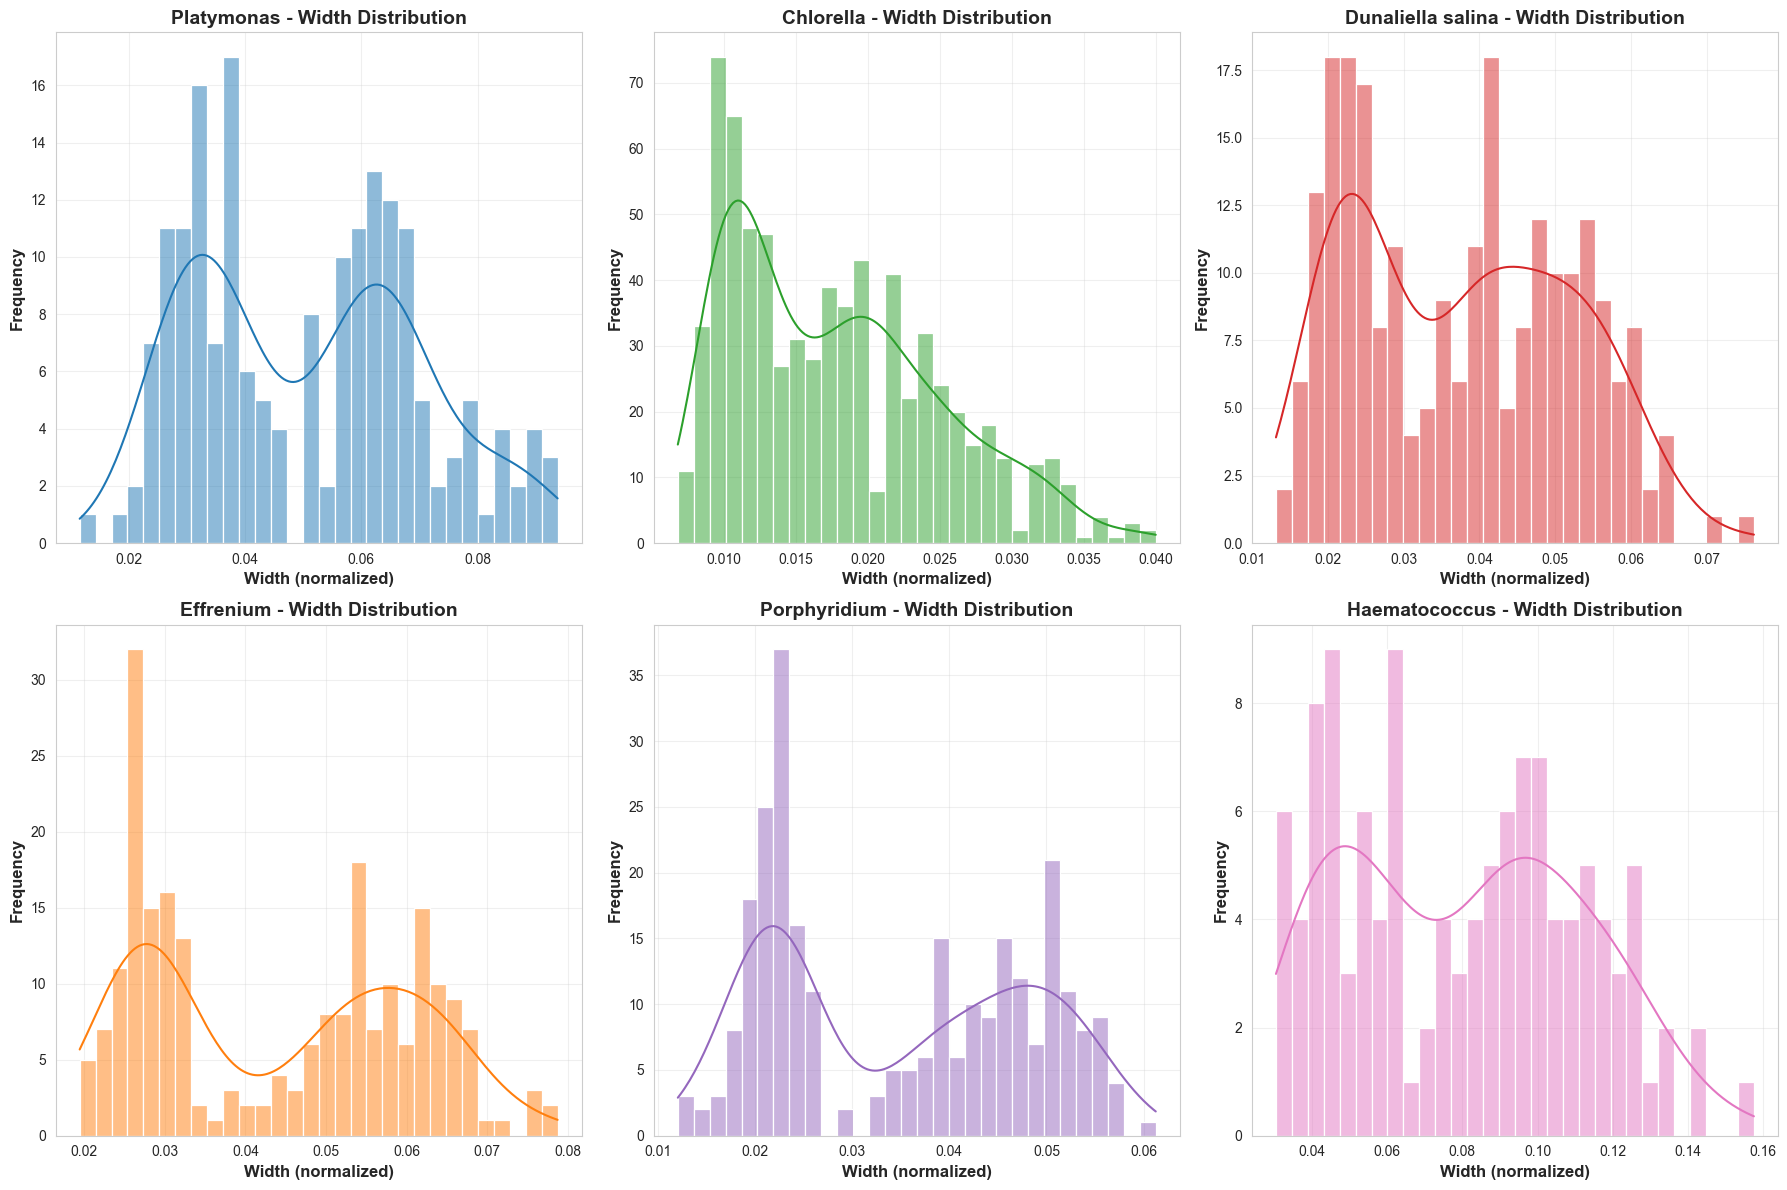

In [51]:
# Individual width distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, class_id in enumerate(sorted(widths.keys())):
    ax = axes[idx]
    sns.histplot(widths[class_id], bins=30, kde=True, color=CLASS_COLORS[class_id], ax=ax)
    ax.set_xlabel('Width (normalized)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'{CLASS_NAMES[class_id]} - Width Distribution', fontsize=14, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Comparison: Height Distributions Across All Types

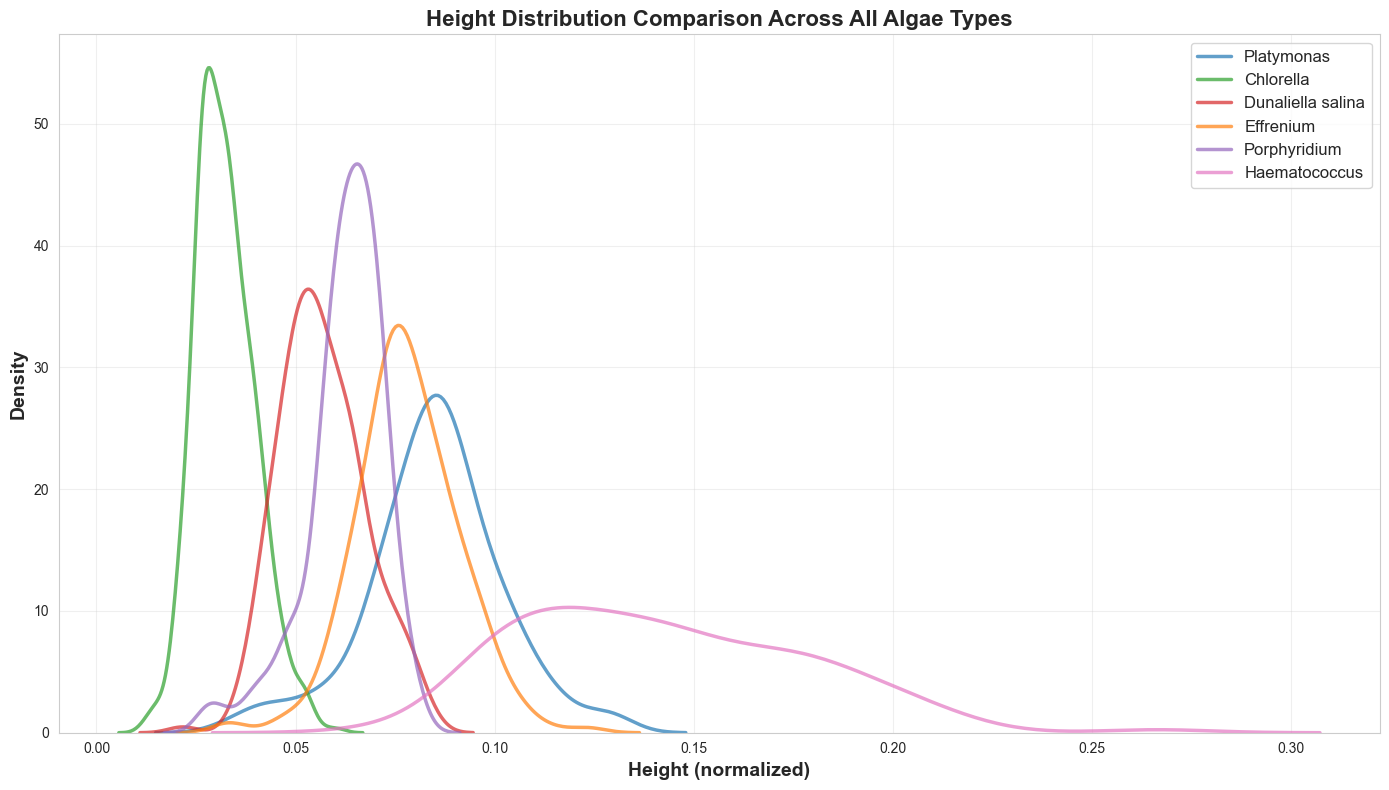

In [52]:
plt.figure(figsize=(14, 8))

for class_id in sorted(heights.keys()):
    sns.kdeplot(heights[class_id], label=CLASS_NAMES[class_id], 
                color=CLASS_COLORS[class_id], linewidth=2.5, alpha=0.7)

plt.xlabel('Height (normalized)', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Height Distribution Comparison Across All Algae Types', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Comparison: Width Distributions Across All Types

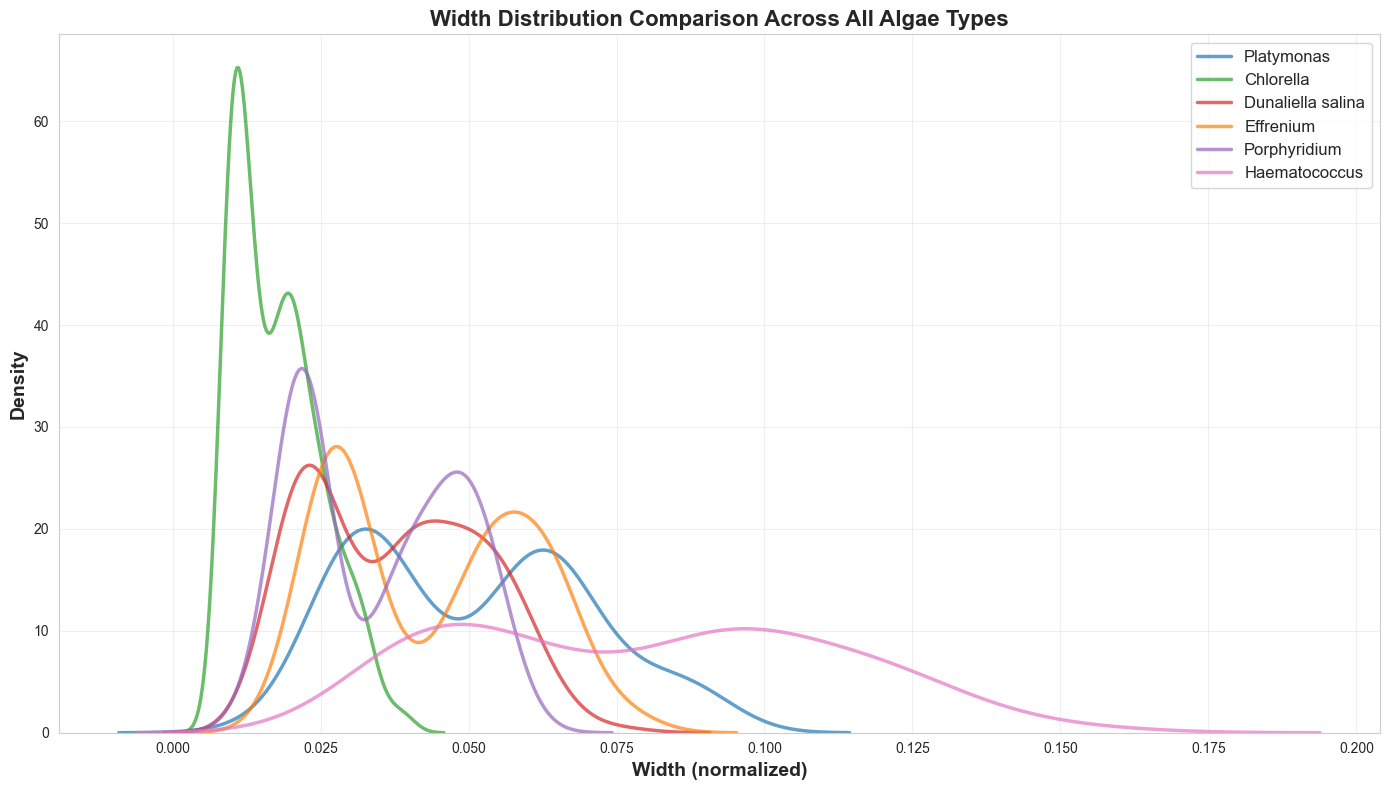

In [53]:
plt.figure(figsize=(14, 8))

for class_id in sorted(widths.keys()):
    sns.kdeplot(widths[class_id], label=CLASS_NAMES[class_id], 
                color=CLASS_COLORS[class_id], linewidth=2.5, alpha=0.7)

plt.xlabel('Width (normalized)', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Width Distribution Comparison Across All Algae Types', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Box Plot Comparison: Heights

C:\Users\afara\AppData\Local\Temp\ipykernel_15160\1745501629.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_heights, x='Algae Type', y='Height', palette=CLASS_COLORS)


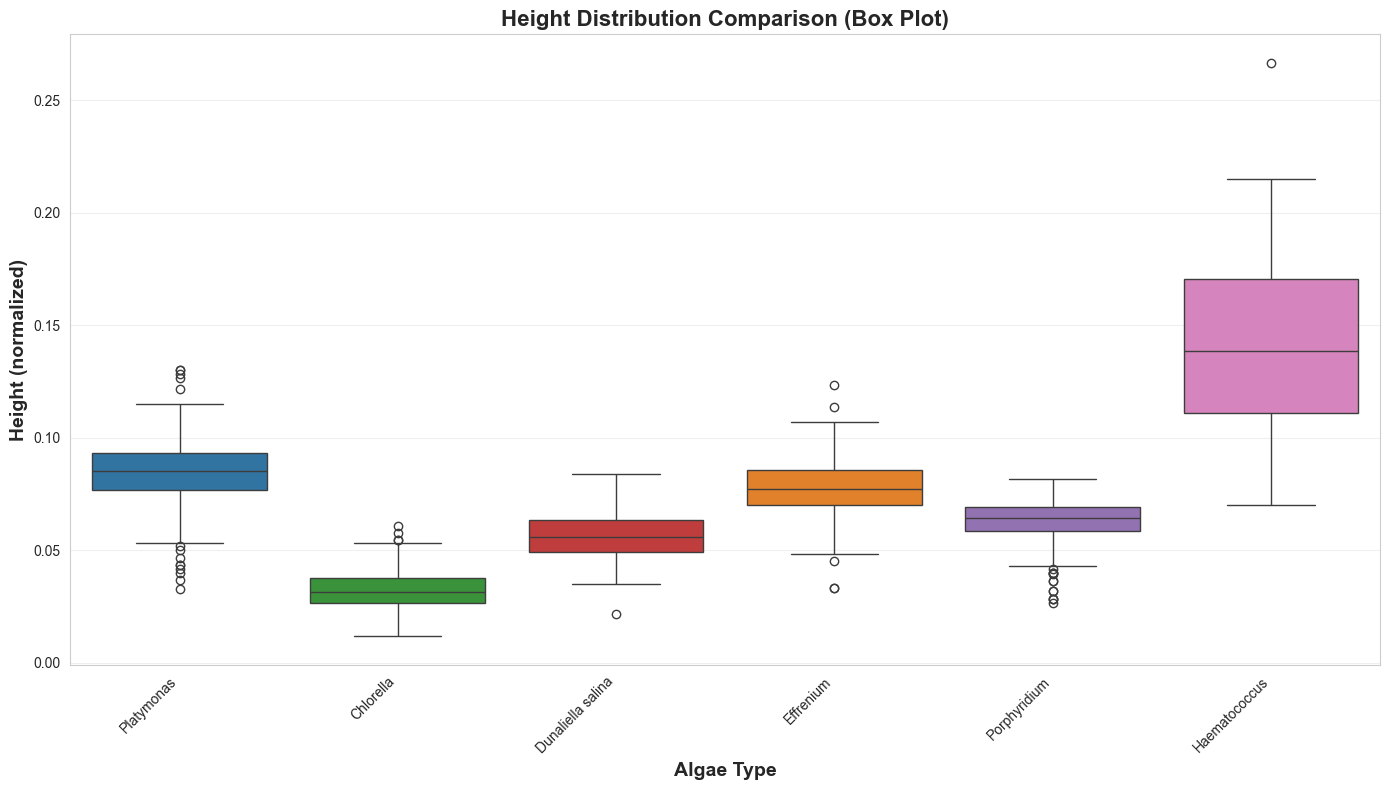

In [54]:
# Prepare data for box plot
height_data = []
height_labels = []

for class_id in sorted(heights.keys()):
    height_data.extend(heights[class_id])
    height_labels.extend([CLASS_NAMES[class_id]] * len(heights[class_id]))

df_heights = pd.DataFrame({'Algae Type': height_labels, 'Height': height_data})

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_heights, x='Algae Type', y='Height', palette=CLASS_COLORS)
plt.xlabel('Algae Type', fontsize=14, fontweight='bold')
plt.ylabel('Height (normalized)', fontsize=14, fontweight='bold')
plt.title('Height Distribution Comparison (Box Plot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Box Plot Comparison: Widths

C:\Users\afara\AppData\Local\Temp\ipykernel_15160\1751875327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_widths, x='Algae Type', y='Width', palette=CLASS_COLORS)


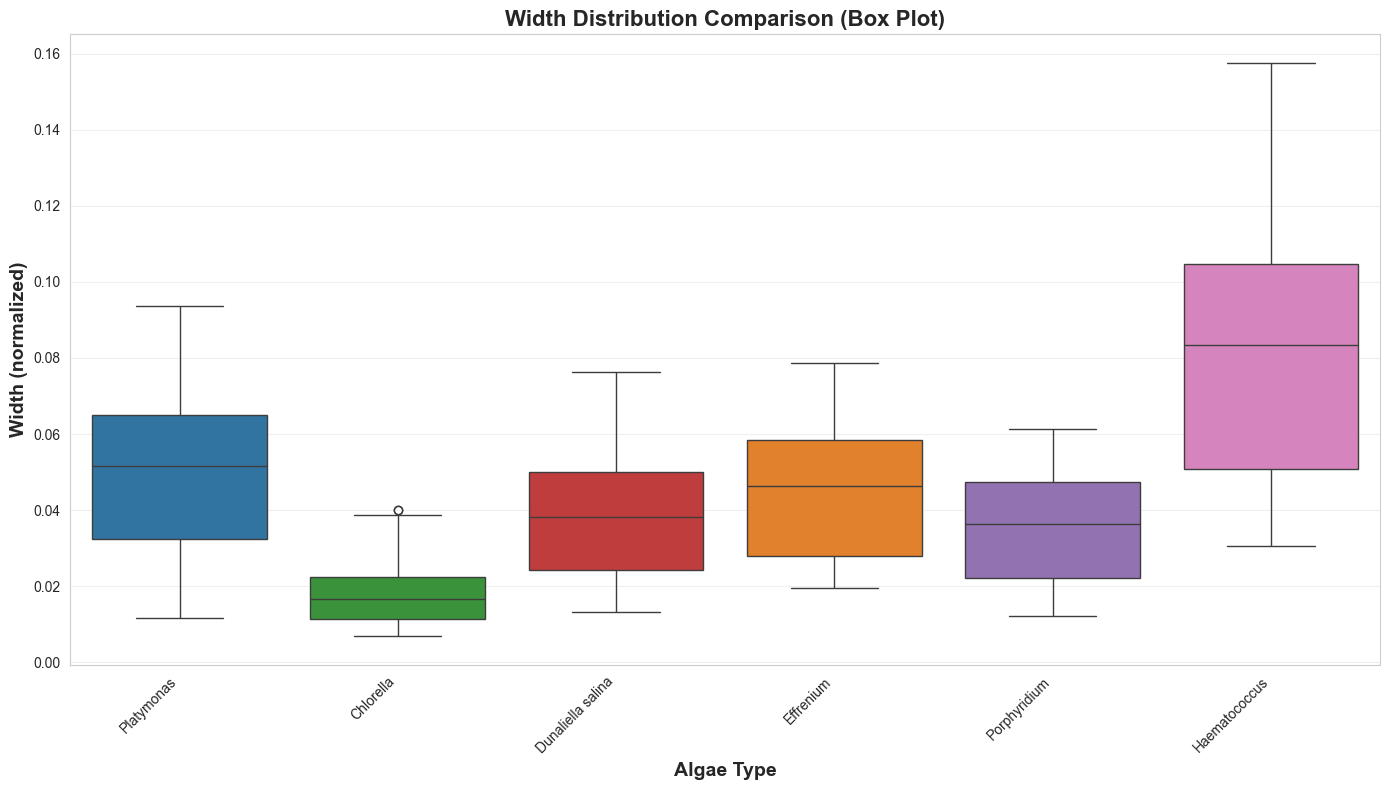

In [55]:
# Prepare data for box plot
width_data = []
width_labels = []

for class_id in sorted(widths.keys()):
    width_data.extend(widths[class_id])
    width_labels.extend([CLASS_NAMES[class_id]] * len(widths[class_id]))

df_widths = pd.DataFrame({'Algae Type': width_labels, 'Width': width_data})

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_widths, x='Algae Type', y='Width', palette=CLASS_COLORS)
plt.xlabel('Algae Type', fontsize=14, fontweight='bold')
plt.ylabel('Width (normalized)', fontsize=14, fontweight='bold')
plt.title('Width Distribution Comparison (Box Plot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Scatter Plot: Height vs Width

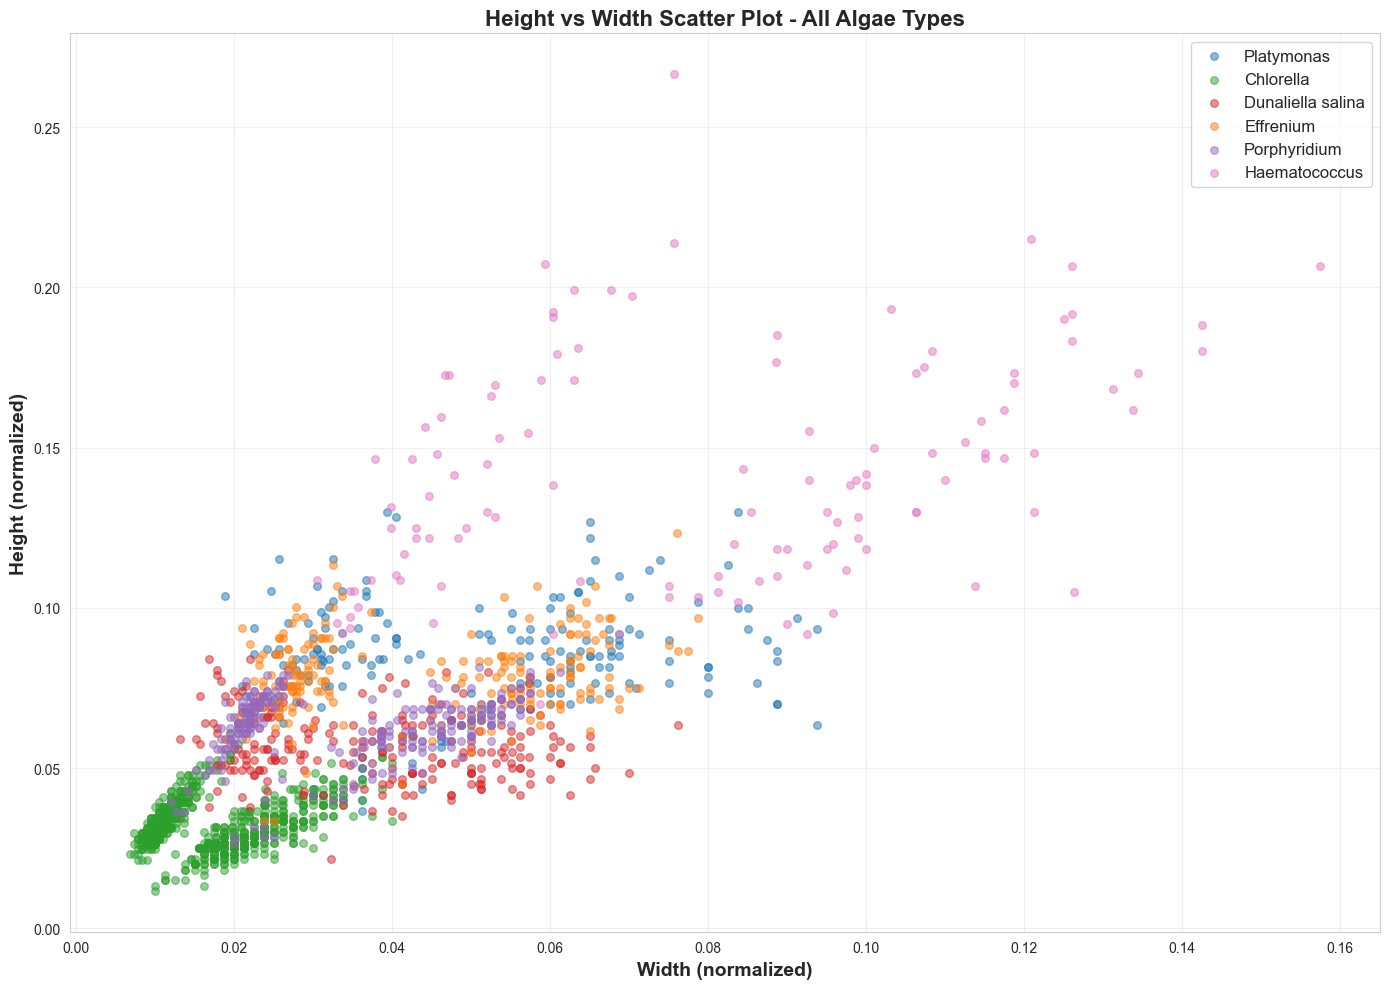

In [56]:
plt.figure(figsize=(14, 10))

for class_id in sorted(heights.keys()):
    plt.scatter(widths[class_id], heights[class_id], 
                label=CLASS_NAMES[class_id], 
                color=CLASS_COLORS[class_id], 
                alpha=0.5, s=30)

plt.xlabel('Width (normalized)', fontsize=14, fontweight='bold')
plt.ylabel('Height (normalized)', fontsize=14, fontweight='bold')
plt.title('Height vs Width Scatter Plot - All Algae Types', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Summary Statistics

In [57]:
# Create summary statistics table
summary_data = []

for class_id in sorted(heights.keys()):
    summary_data.append({
        'Algae Type': CLASS_NAMES[class_id],
        'Count': class_counts[class_id],
        'Avg Height': np.mean(heights[class_id]),
        'Std Height': np.std(heights[class_id]),
        'Avg Width': np.mean(widths[class_id]),
        'Std Width': np.std(widths[class_id]),
        'Avg Area': np.mean(areas[class_id]),
        'Avg Aspect Ratio': np.mean(aspect_ratios[class_id])
    })

df_summary = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("SUMMARY STATISTICS")
print("="*100)
print(df_summary.to_string(index=False))
print("="*100)


SUMMARY STATISTICS
       Algae Type  Count  Avg Height  Std Height  Avg Width  Std Width  Avg Area  Avg Aspect Ratio
       Platymonas    184    0.084889    0.017003   0.050622   0.019459  0.004354          0.613809
        Chlorella    722    0.032326    0.007513   0.017714   0.007253  0.000586          0.566935
Dunaliella salina    234    0.056722    0.010634   0.037635   0.014353  0.002108          0.695719
        Effrenium    227    0.078076    0.012855   0.043959   0.016277  0.003468          0.573246
     Porphyridium    272    0.062599    0.009803   0.034869   0.013276  0.002214          0.563941
    Haematococcus    119    0.142073    0.035276   0.080031   0.031366  0.011743          0.578113


##   Area Analysis Conclusions

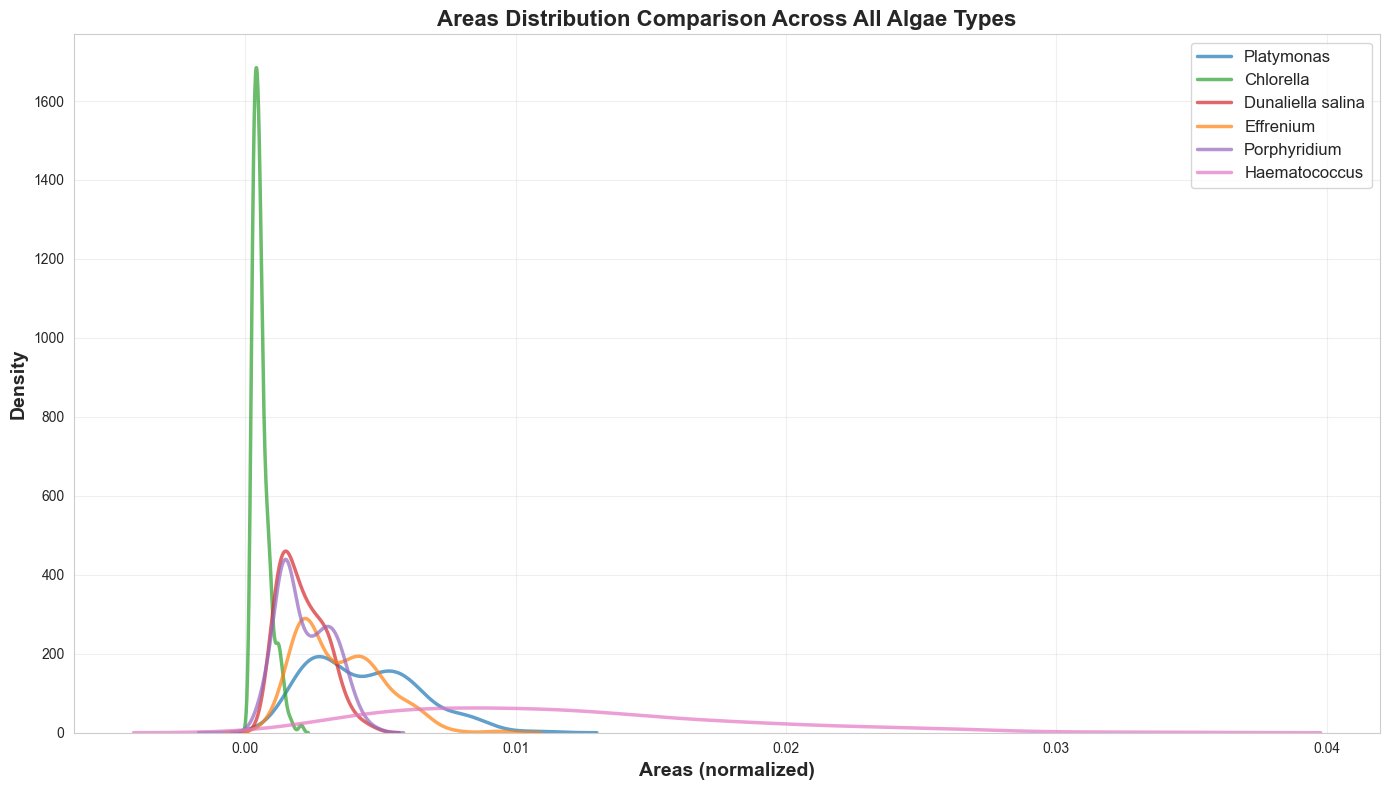

In [58]:
plt.figure(figsize=(14, 8))

for class_id in sorted(areas.keys()):
    sns.kdeplot(areas[class_id], label=CLASS_NAMES[class_id],
                color=CLASS_COLORS[class_id], linewidth=2.5, alpha=0.7)

plt.xlabel('Areas (normalized)', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Areas Distribution Comparison Across All Algae Types', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 11. Color Analysis - Extract Colors from Algae Centers

In [59]:
# Initialize color data structures
colors_rgb = defaultdict(list)  # Store RGB values
colors_hsv = defaultdict(list)  # Store HSV values

image_dir = Path("../data/train/images")
label_dir = Path("../data/train/labels")

print("Extracting color information from algae centers...")
processed_count = 0

# Process each image and its corresponding label
for img_path in sorted(image_dir.glob("*.jpg")):
    label_path = label_dir / (img_path.stem + ".txt")

    if not label_path.exists():
        continue

    # Read image
    img = cv2.imread(str(img_path))
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    height, width = img.shape[:2]

    # Read labels and extract colors from centers
    with open(label_path, 'r') as f:
        for line in f:
            if line.strip():
                parts = line.split()
                class_id = int(parts[0])
                x_center = float(parts[1]) * width
                y_center = float(parts[2]) * height

                # Get pixel color at center (ensure within bounds)
                x = int(min(max(x_center, 0), width - 1))
                y = int(min(max(y_center, 0), height - 1))

                # Extract RGB and HSV values
                rgb_color = img_rgb[y, x]
                hsv_color = img_hsv[y, x]

                colors_rgb[class_id].append(rgb_color)
                colors_hsv[class_id].append(hsv_color)

    processed_count += 1
    if processed_count % 100 == 0:
        print(f"Processed {processed_count} images...")

print(f"\nTotal images processed: {processed_count}")
print("\nColor samples per class:")
for class_id in sorted(colors_rgb.keys()):
    print(f"{CLASS_NAMES[class_id]}: {len(colors_rgb[class_id])} samples")

Extracting color information from algae centers...
Processed 100 images...
Processed 200 images...
Processed 300 images...
Processed 400 images...
Processed 500 images...
Processed 600 images...
Processed 700 images...

Total images processed: 700

Color samples per class:
Platymonas: 184 samples
Chlorella: 722 samples
Dunaliella salina: 234 samples
Effrenium: 227 samples
Porphyridium: 272 samples
Haematococcus: 119 samples


## 12. Average Color Visualization Per Class


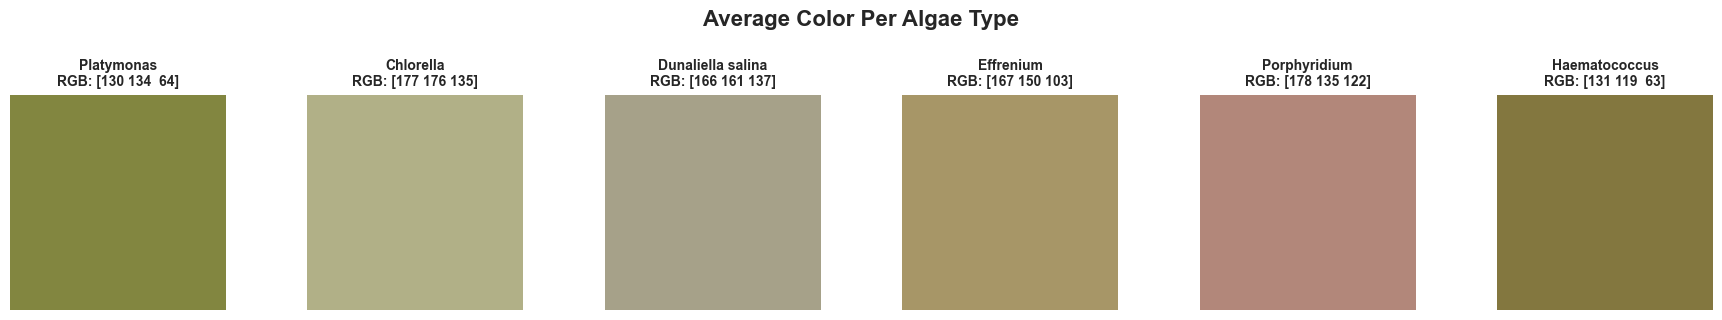

In [60]:
# Calculate average colors
avg_colors = {}
for class_id in sorted(colors_rgb.keys()):
    avg_colors[class_id] = np.mean(colors_rgb[class_id], axis=0).astype(int)

# Visualize average colors
fig, axes = plt.subplots(1, 6, figsize=(18, 3))

for idx, class_id in enumerate(sorted(avg_colors.keys())):
    color_patch = np.ones((100, 100, 3), dtype=np.uint8)
    color_patch[:, :] = avg_colors[class_id]

    axes[idx].imshow(color_patch)
    axes[idx].set_title(f"{CLASS_NAMES[class_id]}\nRGB: {avg_colors[class_id]}",
                       fontsize=10, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Average Color Per Algae Type', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

## 13. RGB Channel Distribution Per Class


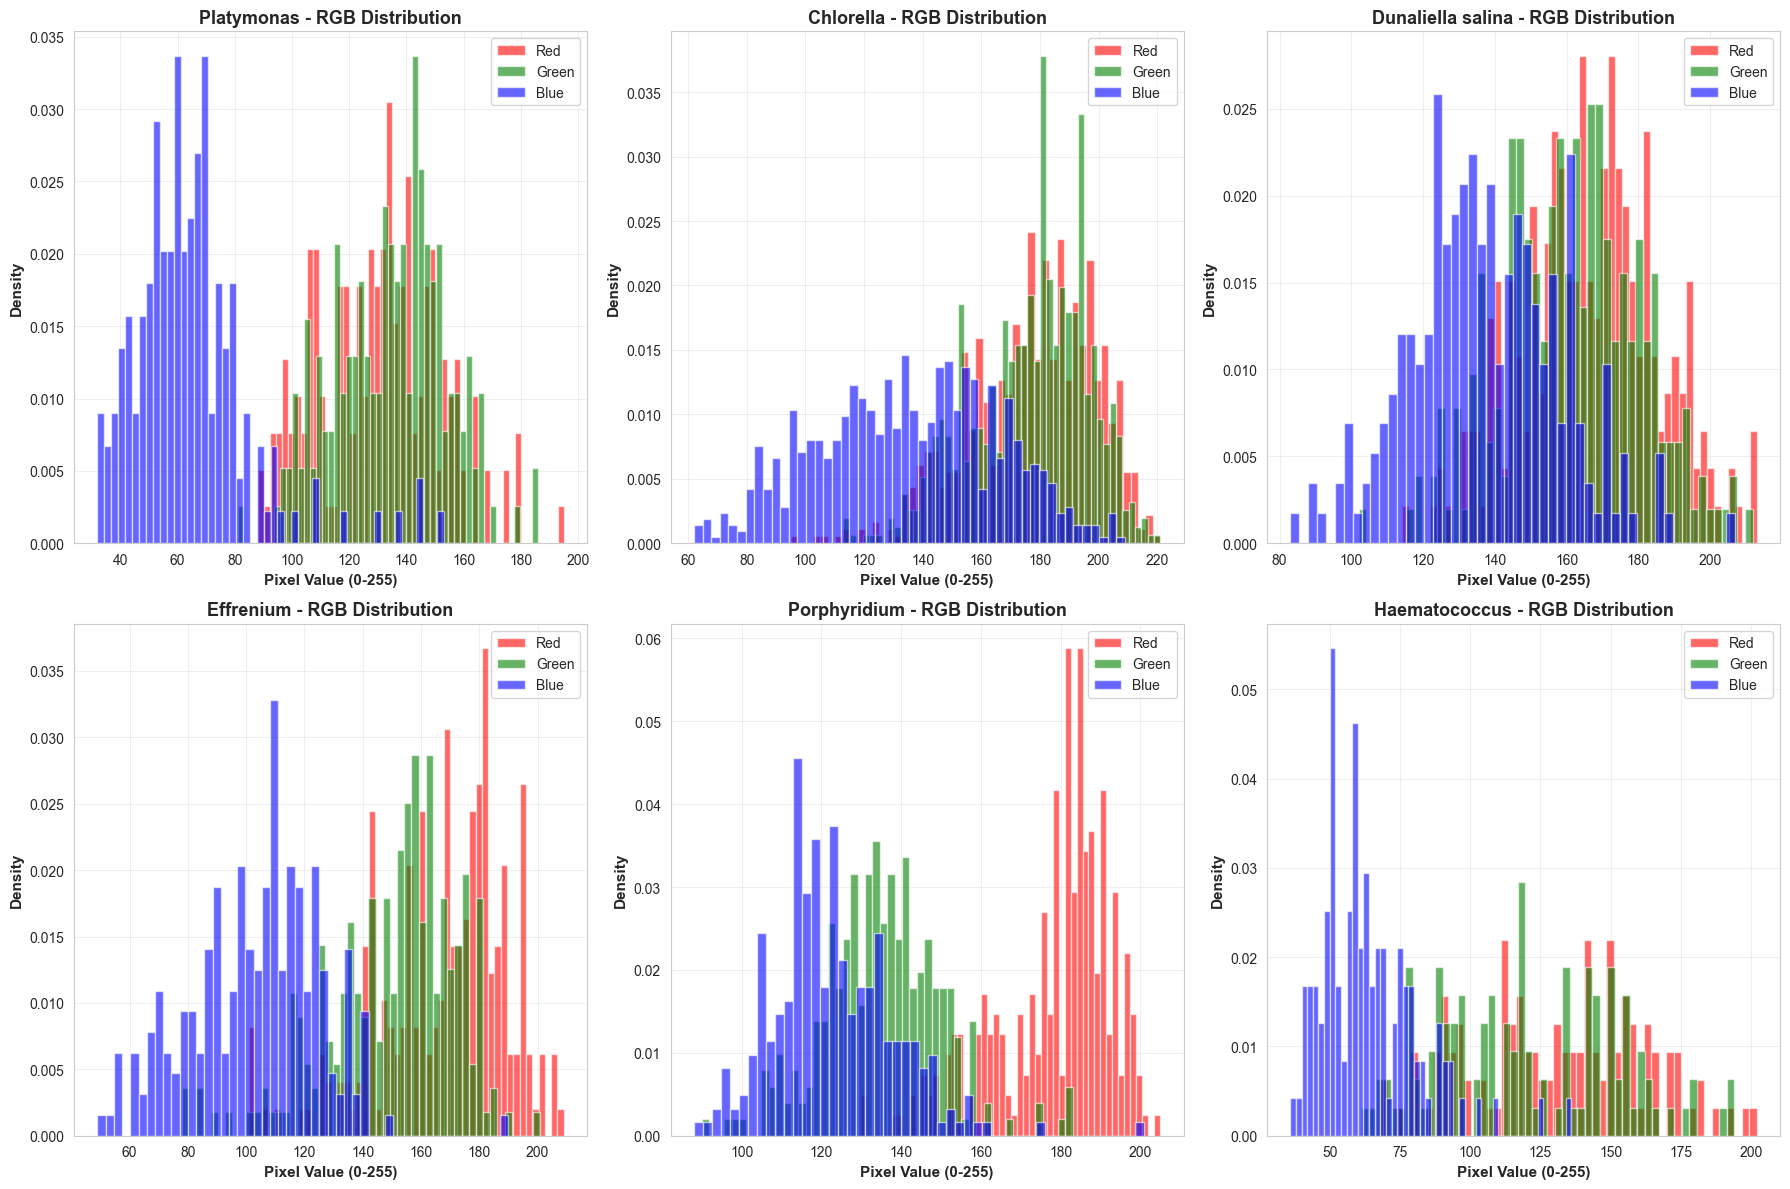

In [61]:
# Individual RGB distributions for each class
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, class_id in enumerate(sorted(colors_rgb.keys())):
    ax = axes[idx]
    rgb_array = np.array(colors_rgb[class_id])

    # Plot each channel
    ax.hist(rgb_array[:, 0], bins=50, alpha=0.6, color='red', label='Red', density=True)
    ax.hist(rgb_array[:, 1], bins=50, alpha=0.6, color='green', label='Green', density=True)
    ax.hist(rgb_array[:, 2], bins=50, alpha=0.6, color='blue', label='Blue', density=True)

    ax.set_xlabel('Pixel Value (0-255)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Density', fontsize=11, fontweight='bold')
    ax.set_title(f'{CLASS_NAMES[class_id]} - RGB Distribution', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 14. RGB Comparison - All Classes on One Graph


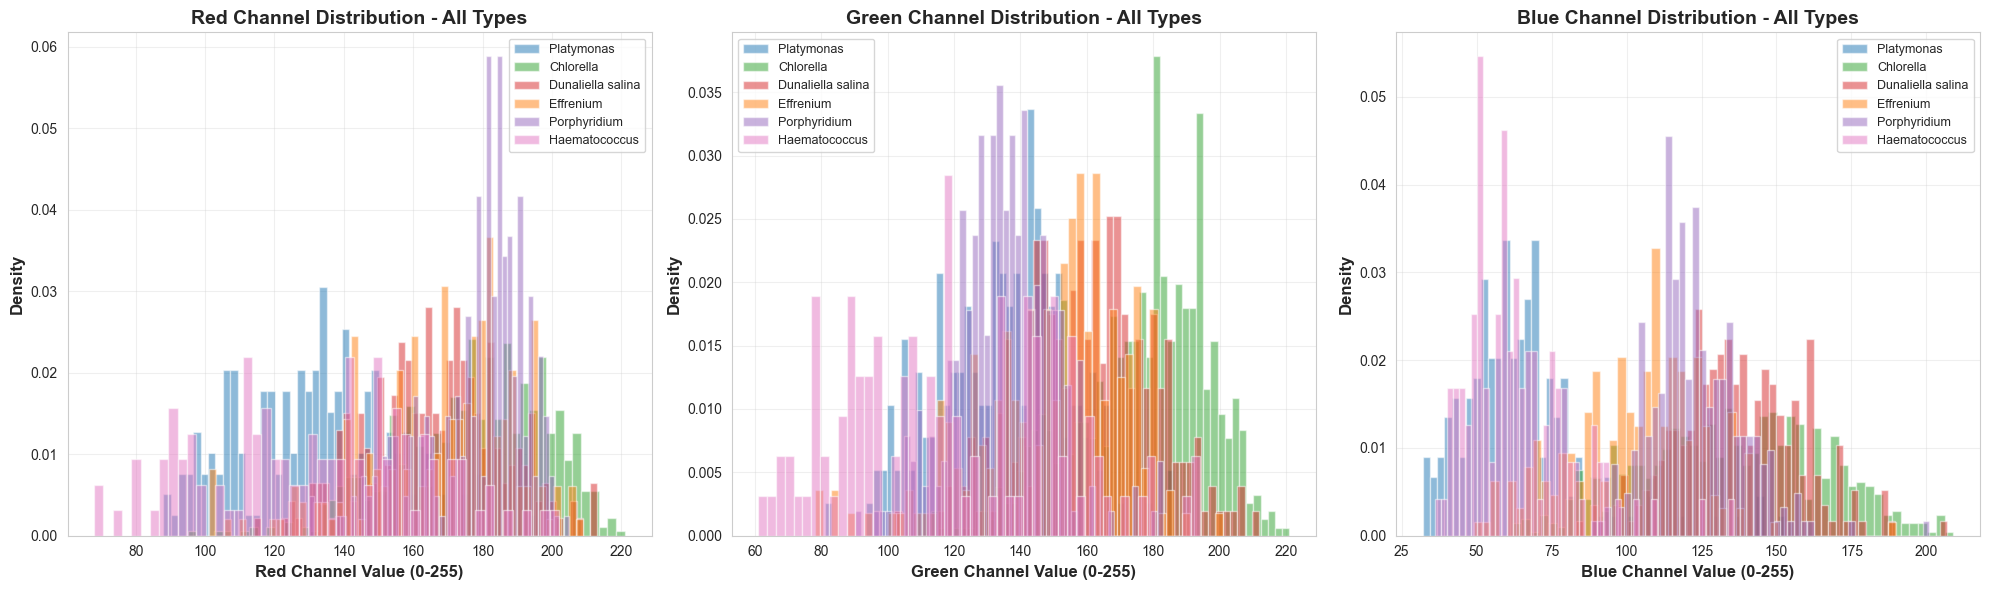

In [62]:
# Red, Green, Blue channel comparisons
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
channel_names = ['Red', 'Green', 'Blue']

for ch_idx, channel_name in enumerate(channel_names):
    ax = axes[ch_idx]

    for class_id in sorted(colors_rgb.keys()):
        rgb_array = np.array(colors_rgb[class_id])
        ax.hist(rgb_array[:, ch_idx], bins=50, alpha=0.5,
               label=CLASS_NAMES[class_id],
               color=CLASS_COLORS[class_id], density=True)

    ax.set_xlabel(f'{channel_name} Channel Value (0-255)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Density', fontsize=12, fontweight='bold')
    ax.set_title(f'{channel_name} Channel Distribution - All Types', fontsize=14, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 15. 3D RGB Color Space Visualization


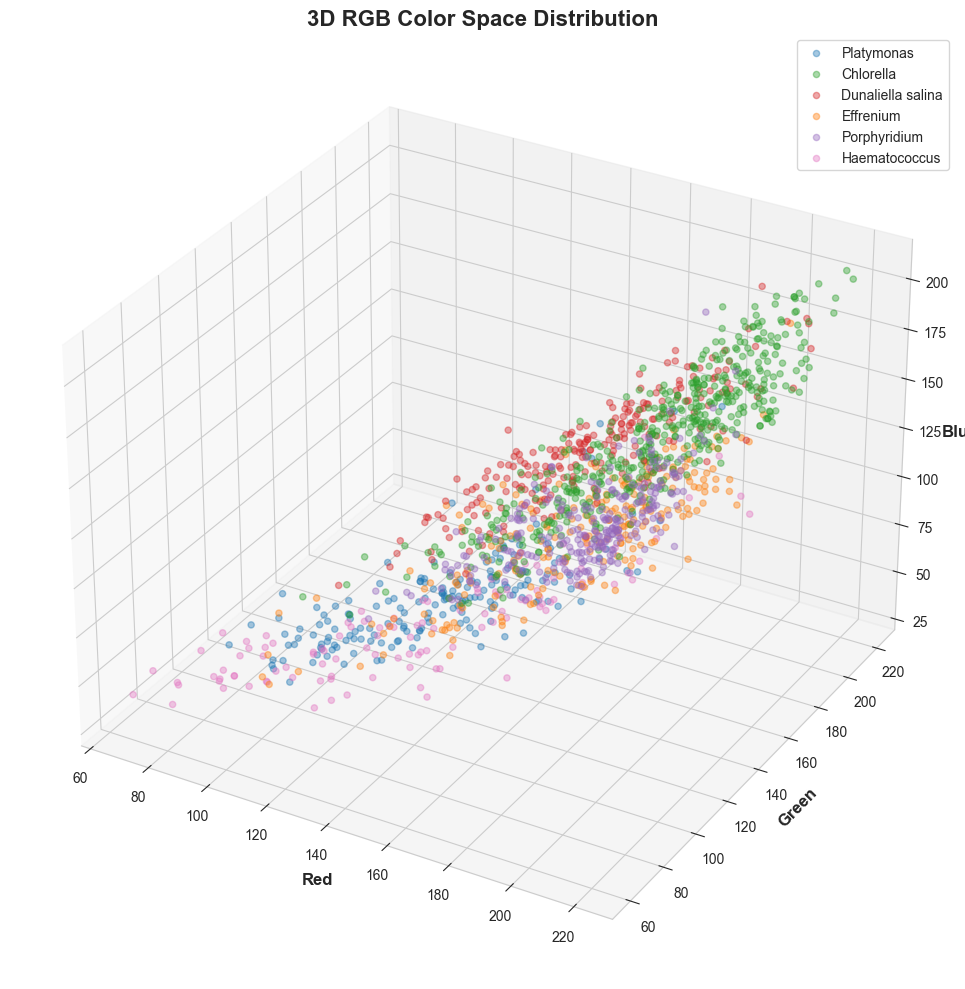

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Sample points for better visualization
sample_size = 500

for class_id in sorted(colors_rgb.keys()):
    rgb_array = np.array(colors_rgb[class_id])

    # Sample random points
    if len(rgb_array) > sample_size:
        indices = np.random.choice(len(rgb_array), sample_size, replace=False)
        rgb_sample = rgb_array[indices]
    else:
        rgb_sample = rgb_array

    ax.scatter(rgb_sample[:, 0], rgb_sample[:, 1], rgb_sample[:, 2],
              label=CLASS_NAMES[class_id],
              color=CLASS_COLORS[class_id],
              alpha=0.4, s=20)

ax.set_xlabel('Red', fontsize=12, fontweight='bold')
ax.set_ylabel('Green', fontsize=12, fontweight='bold')
ax.set_zlabel('Blue', fontsize=12, fontweight='bold')
ax.set_title('3D RGB Color Space Distribution', fontsize=16, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Hue comparison across all classes


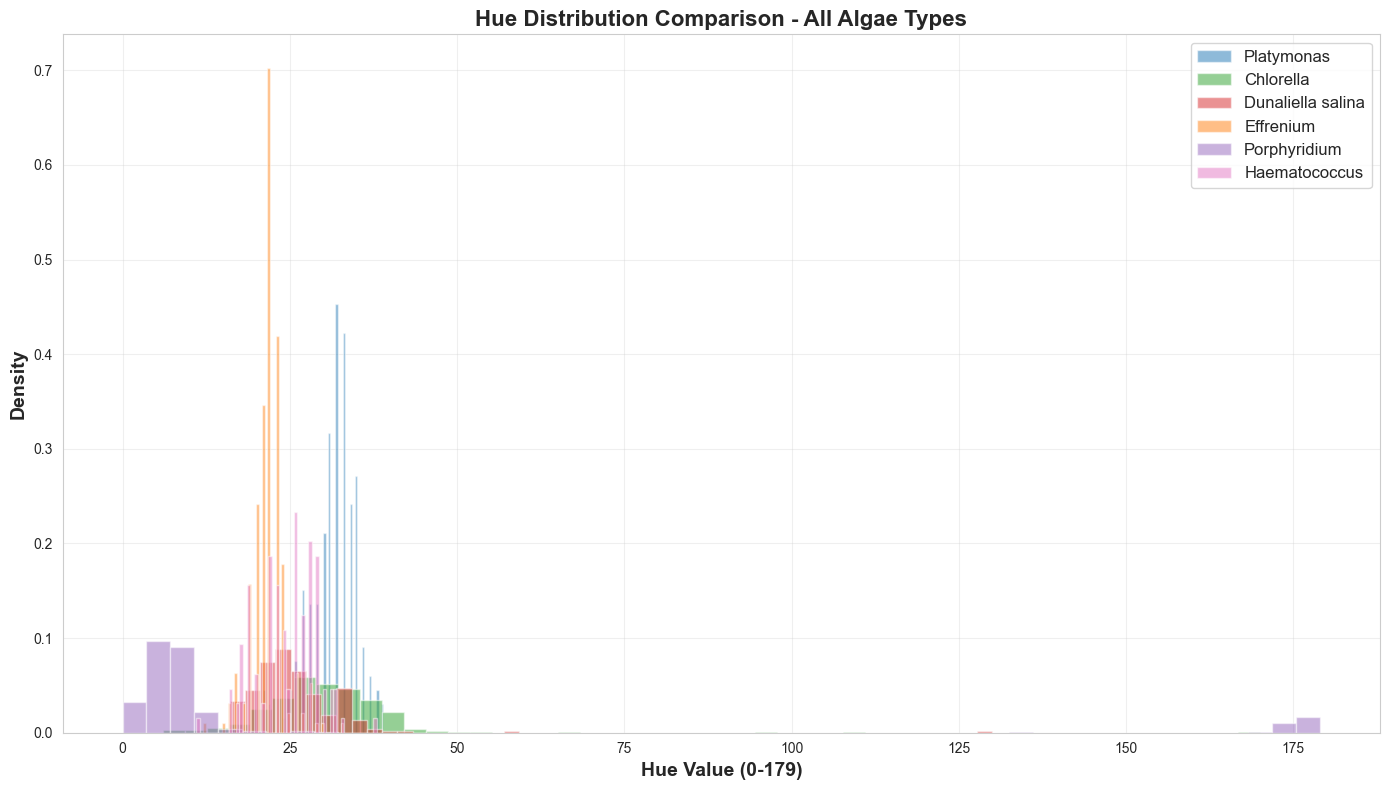

In [64]:
plt.figure(figsize=(14, 8))

for class_id in sorted(colors_hsv.keys()):
    hsv_array = np.array(colors_hsv[class_id])
    hue_values = hsv_array[:, 0]  # Hue is in range 0-179 in OpenCV

    plt.hist(hue_values, bins=50, alpha=0.5,
            label=CLASS_NAMES[class_id],
            color=CLASS_COLORS[class_id], density=True)

plt.xlabel('Hue Value (0-179)', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Hue Distribution Comparison - All Algae Types', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 17. Color Statistics Summary


In [65]:
# Create color statistics table
color_stats = []

for class_id in sorted(colors_rgb.keys()):
    rgb_array = np.array(colors_rgb[class_id])
    hsv_array = np.array(colors_hsv[class_id])

    color_stats.append({
        'Algae Type': CLASS_NAMES[class_id],
        'Avg R': np.mean(rgb_array[:, 0]),
        'Avg G': np.mean(rgb_array[:, 1]),
        'Avg B': np.mean(rgb_array[:, 2]),
        'Std R': np.std(rgb_array[:, 0]),
        'Std G': np.std(rgb_array[:, 1]),
        'Std B': np.std(rgb_array[:, 2]),
        'Avg Hue': np.mean(hsv_array[:, 0]),
        'Avg Saturation': np.mean(hsv_array[:, 1]),
        'Avg Value': np.mean(hsv_array[:, 2])
    })

df_color_stats = pd.DataFrame(color_stats)
print("\n" + "="*120)
print("COLOR STATISTICS SUMMARY")
print("="*120)
print(df_color_stats.to_string(index=False, float_format='%.2f'))
print("="*120)


COLOR STATISTICS SUMMARY
       Algae Type  Avg R  Avg G  Avg B  Std R  Std G  Std B  Avg Hue  Avg Saturation  Avg Value
       Platymonas 130.34 134.38  64.41  21.07  19.30  20.18    31.54          134.70     135.84
        Chlorella 177.34 176.51 135.07  21.21  19.80  30.53    29.92           66.88     181.18
Dunaliella salina 166.36 161.18 137.32  19.26  19.38  20.73    25.79           45.53     166.93
        Effrenium 167.83 150.07 103.40  21.72  21.98  21.90    21.86           98.37     167.85
     Porphyridium 178.20 135.27 122.88  14.39  14.78  15.12    24.69           79.91     178.24
    Haematococcus 131.55 119.57  63.33  30.19  31.66  17.33    24.52          131.03     131.87
